In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from img_util import imshow
import skimage as ski

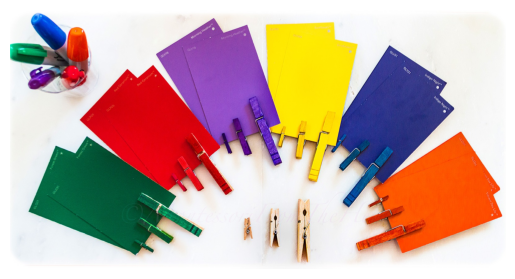

In [4]:
img=cv2.imread('4.jpg')
imshow(img[:,:,::-1],'')

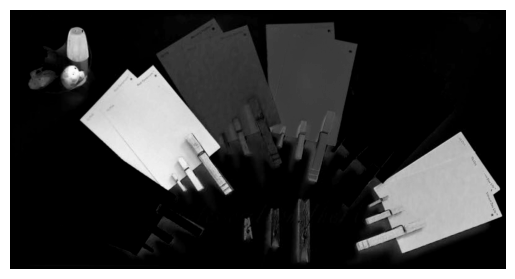

In [5]:
red_img=cv2.subtract(img[:,:,-1],cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))
imshow(red_img,'','gray')

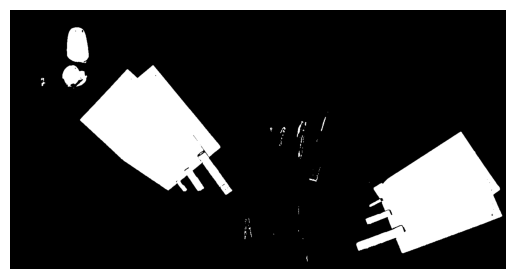

In [6]:
_,red_bw=cv2.threshold(red_img,60,255,cv2.THRESH_BINARY)
imshow(red_bw,'','gray')

In [7]:
strel=cv2.getStructuringElement(cv2.MORPH_RECT,(10,10))
strel

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

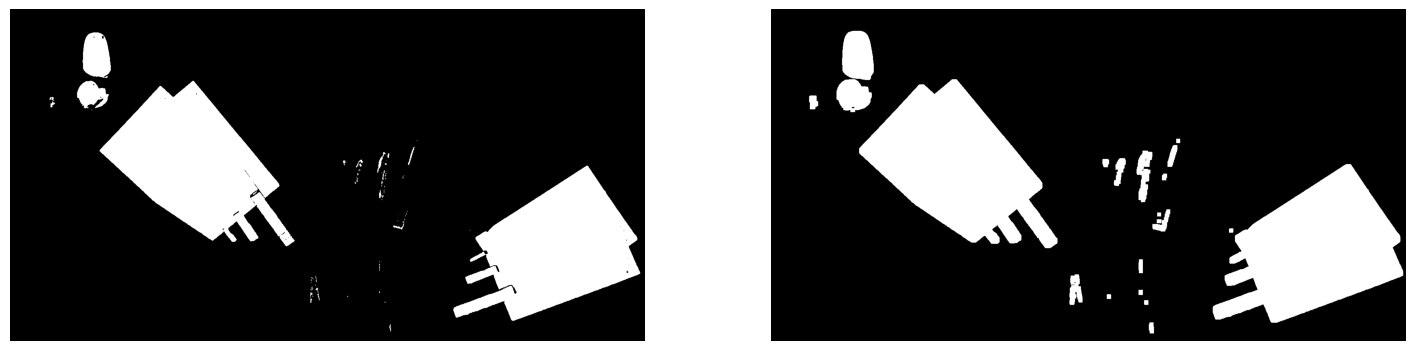

In [8]:
plt.figure(figsize=(18,6))
plt.subplot(121)
imshow(red_bw,'','gray')
plt.subplot(122)

red_dilate=cv2.dilate(red_bw,strel)
imshow(red_dilate,'','gray')

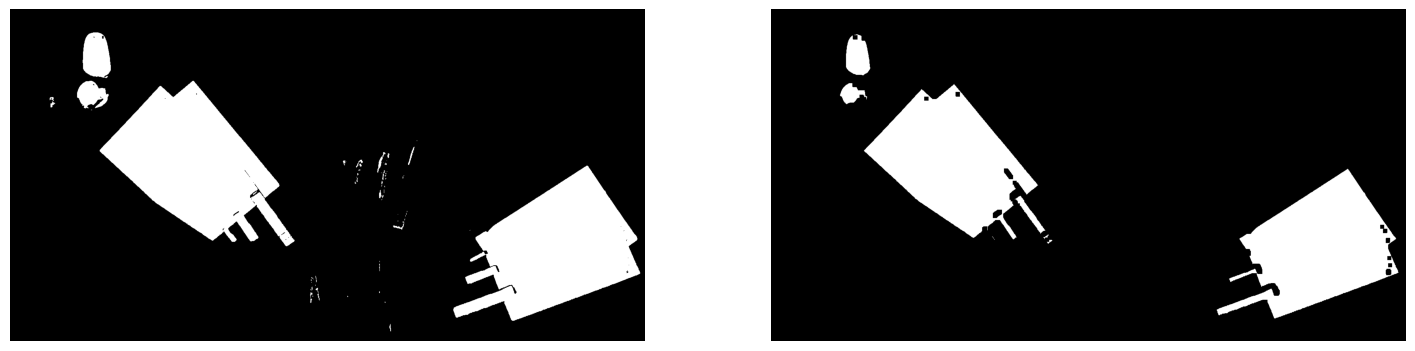

In [9]:
plt.figure(figsize=(18,6))
plt.subplot(121)
imshow(red_bw,'','gray')
plt.subplot(122)

red_erode=cv2.erode(red_bw,strel)
imshow(red_erode,'','gray')

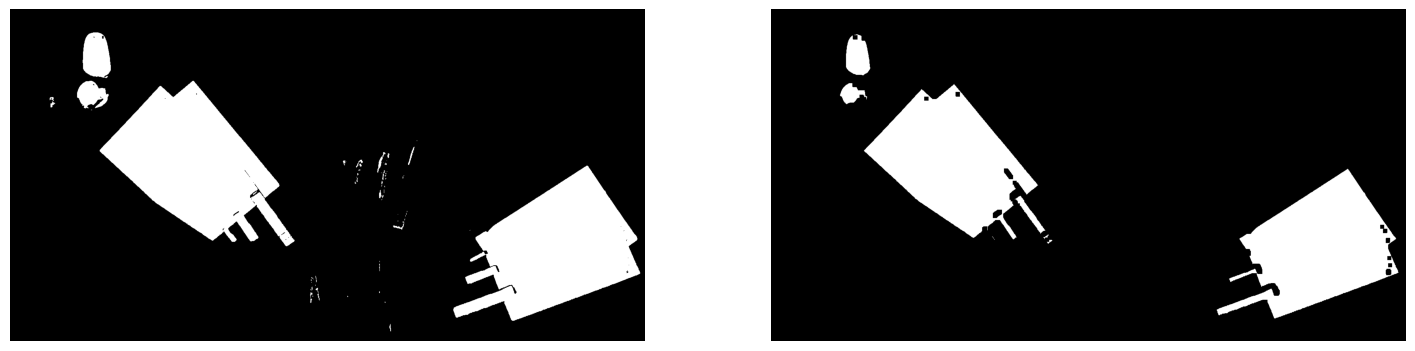

In [10]:
plt.figure(figsize=(18,6))
plt.subplot(121)
imshow(red_bw,'','gray')
plt.subplot(122)

red_open=cv2.morphologyEx(red_bw,cv2.MORPH_OPEN,strel)
imshow(red_erode,'','gray')

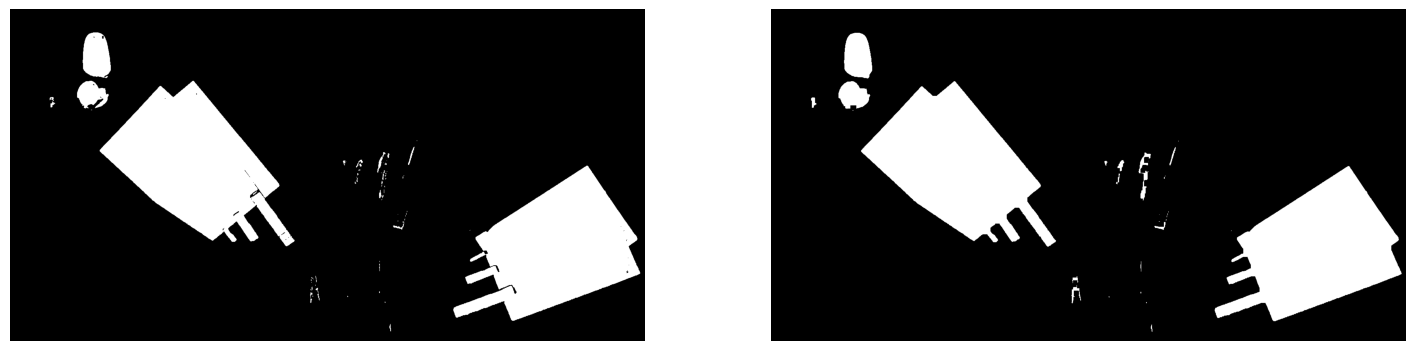

In [11]:
plt.figure(figsize=(18,6))
plt.subplot(121)
imshow(red_bw,'','gray')
plt.subplot(122)

red_close=cv2.morphologyEx(red_bw,cv2.MORPH_CLOSE,strel,iterations=1)
imshow(red_close,'','gray')

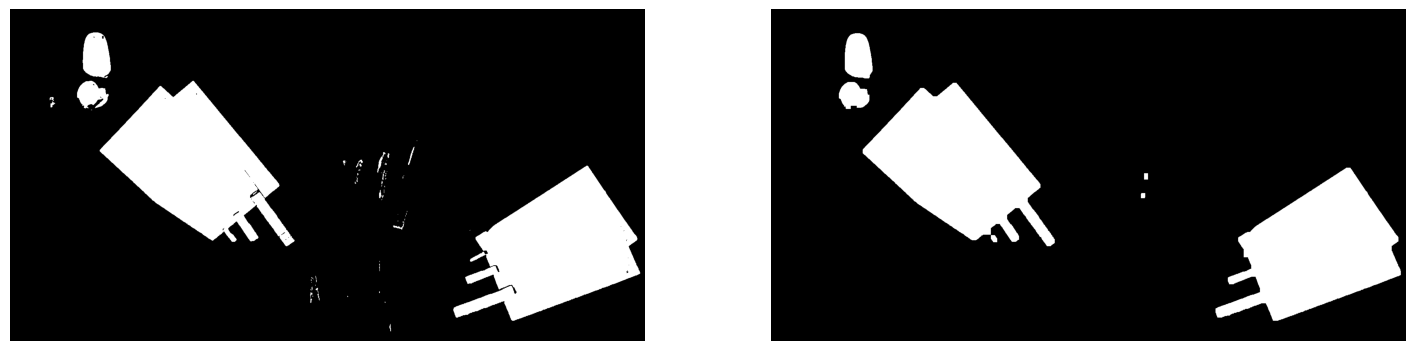

In [12]:
plt.figure(figsize=(18,6))
plt.subplot(121)
imshow(red_bw,'','gray')
plt.subplot(122)

red_close2=cv2.morphologyEx(red_close,cv2.MORPH_OPEN,strel,iterations=1)
imshow(red_close2,'','gray')

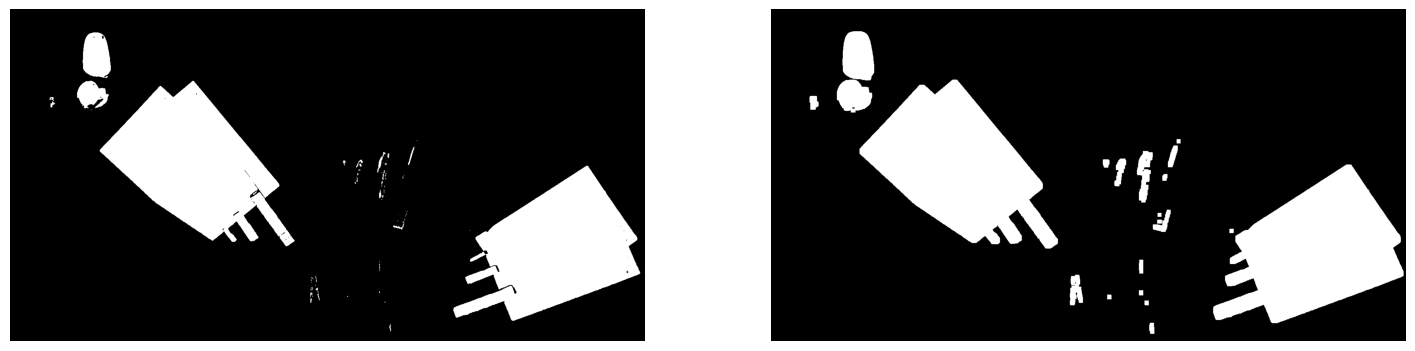

In [13]:
plt.figure(figsize=(18,6))
plt.subplot(121)
imshow(red_bw,'','gray')
plt.subplot(122)

red_close2=cv2.morphologyEx(red_dilate,cv2.MORPH_OPEN,strel,iterations=1)
imshow(red_close2,'','gray')

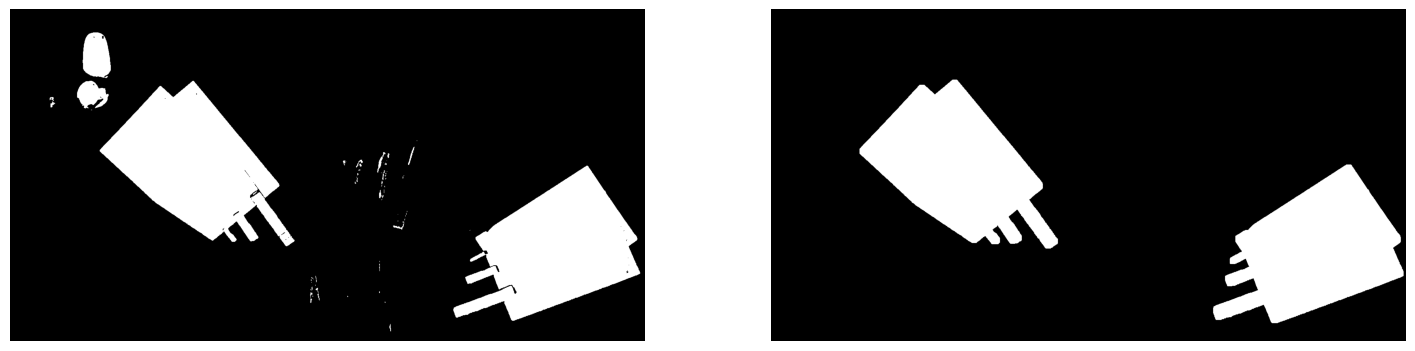

In [14]:
plt.figure(figsize=(18,6))
plt.subplot(121)
imshow(red_bw,'','gray')
plt.subplot(122)

red_close3=ski.morphology.remove_small_objects(red_close2.astype(bool),15000)
imshow(red_close3,'','gray')

In [15]:
red_close3.dtype

dtype('bool')

In [16]:
rp=ski.measure.regionprops(ski.measure.label(red_close3.astype('uint8')))
rp

In [17]:
(red_close3.astype('uint8').max()*255)

255

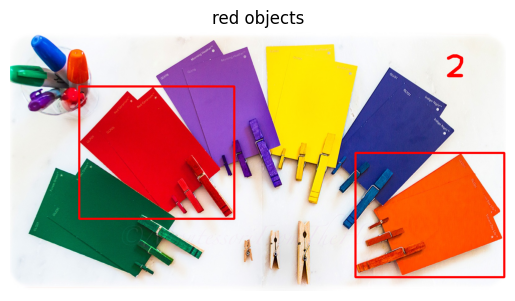

In [18]:
img_copy=img.copy()
for r in rp:
    y1,x1,y2,x2=r.bbox
    cv2.rectangle(img_copy,(x1,y1),(x2,y2),color=[0,0,255],thickness=5)
imshow(img_copy[:,:,::-1],'Red objects detected')
count=str(len(rp))
cv2.putText(img_copy,count,(img_copy.shape[1]-200,150),cv2.FONT_HERSHEY_PLAIN,7,(0,0,255),thickness=10)
imshow(img_copy[:,:,::-1],'red objects')

In [23]:
vid = cv2.VideoCapture(0)
while True:
    ack, img = vid.read()
    if ack:
        red_img = cv2.subtract(img[:,:,-1], cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
        _, red_bw = cv2.threshold(red_img, 60, 255, cv2.THRESH_BINARY)
        strel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
        red_dilate = cv2.dilate(red_bw, strel)
        red_close2 = cv2.morphologyEx(red_dilate, cv2.MORPH_OPEN, strel, iterations = 1)
        red_close3 = ski.morphology.remove_small_objects(red_close2.astype(bool), 15000)              # if number of pixels are less then 15000 at some place it is then considered as a noise and it will remove it
        rp = ski.measure.regionprops(
            ski.measure.label(
            red_close3.astype('uint8')
            )
        )
        img_copy = img.copy()
        for r in rp:
            y1,x1,y2,x2 = r.bbox
            cv2.rectangle(img_copy, (x1,y1), (x2,y2), color=[0,0,255], thickness=5)
        count = str(len(rp))
        cv2.putText(
                    img_copy, count, (img_copy.shape[1]-200, 150), 
                    cv2.FONT_HERSHEY_PLAIN, 7, (0,0,255), thickness=10
            )

        cv2.imshow('Preview', img_copy)
        key = cv2.waitKey(1)             
        if key == ord('x'):              
            break

cv2.destroyAllWindows()
vid.release()   

In [24]:
ack

True